In [ ]:
# Using tensorflow
# Train a neural network to recognize numbers
# MNIST data set has many different variations not only numbers
# Used to recognize clothing articles and recommended what goes with what using ML methods


In [ ]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Keras use to be there own thing
# Tensorflow bought keras
# Google owns Tensorflow
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

sns.set()

In [ ]:
# Create two tuples
# From the data set load the data into test and training data
# The data must be cleaned to go straight into splitting the data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# total number of images in our training set
# 60K images, each image is 28 x 28
x_train.shape

(60000, 28, 28)

In [ ]:
# the shape of just one image
x_train[4].shape

(28, 28)

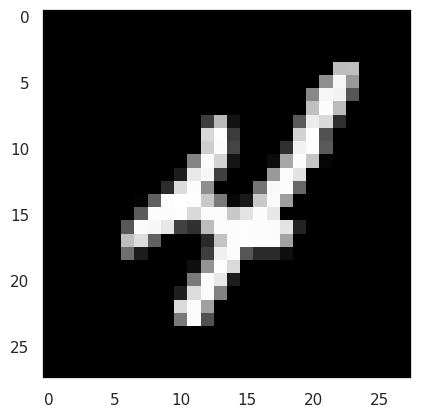

In [ ]:
# every digit on the data set looks like the following
plt.imshow(x_train[9], cmap=plt.cm.gray, interpolation='nearest')
plt.grid(None)

In [ ]:
# images on our dataset
print(y_train[4])

9


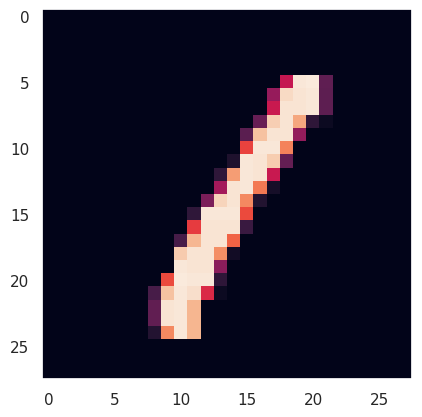

In [ ]:
# show in color 
plt.imshow(x_train[3])
plt.grid(None)

In [ ]:
# These images are in tables but we are seeing images
# rbg image decomposition, this goes for every picture you ever seen
# red green blue
# when it is black or white it is only one layer
# vector form of the image (gray scale image so just one layer)
np.set_printoptions(edgeitems=30, linewidth=100000)
print(x_train[3])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 124 253 255  63   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  96 244 251 253  62   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 127 251 251 253  62   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  68 236 251 21

In [ ]:
# normalizing the image
# get all the layers from those images and normalize it
# get all the values from all layers and flatten them down to 1 
# in order to do so need to take those values and divide by the value that allows 3 to 1 which is 255
# 0 - 254, so a range of 0 - 255 each cel
x_train, x_test = x_train/255.0, x_test/255.0

In [ ]:
# Creating the neural network model
# Sequential() this is a class which comes from keras, us going to the store and buying a box of legos
model = Sequential() 
# add the layers to the model, first a flattening layer, every node is going take 28x28
model.add(Flatten(input_shape=(28, 28)))
# 32 32 and 10 are the number of nodes in each layer
# activation function which is the function inside the node that is making the calculation
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
# how the network is composed
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 26506 (103.54 KB)
Trainable params: 26506 (103.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


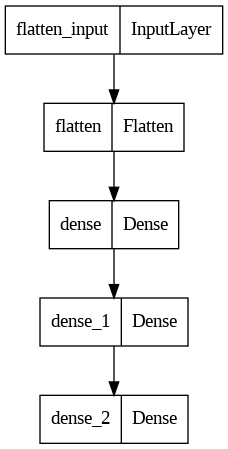

In [ ]:
# visualize the model
from tensorflow.keras.utils import plot_model
plot_model(model)

In [ ]:
# compose aka compile the model
# in this step we tell the model how we want the model to be trained
# intro to deep learning pdf
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# create a class to tell to the model to do their thing but when they get to a certain number
# tell us which was the best
# a callback from keras
# once the accuracy get to 99% stop 
class accuracy99Callback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if (logs.get('accuracy') > 0.999):
            print("\n\nWe reached 99.9% accuracy!\n")
            self.model.stop_training = True

In [ ]:
# training on the data
# epochs = number of cycles while it is training itself
# once it reaches that number of epochs stop the training if dont reach the accuracy %
model.fit(x_train, y_train, epochs = 40, validation_data=(x_test, y_test), callbacks=[accuracy99Callback()])

Epoch 1/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0609 - accuracy: 0.9812 - val_loss: 0.1134 - val_accuracy: 0.9684
Epoch 2/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0575 - accuracy: 0.9814 - val_loss: 0.1243 - val_accuracy: 0.9666
Epoch 3/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0529 - accuracy: 0.9829 - val_loss: 0.1127 - val_accuracy: 0.9676
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0476 - accuracy: 0.9845 - val_loss: 0.1118 - val_accuracy: 0.9700
Epoch 5/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0450 - accuracy: 0.9861 - val_loss: 0.1274 - val_accuracy: 0.9657
Epoch 6/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0413 - accuracy: 0.9865 - val_loss: 0.1195 - val_accuracy: 0.9688
Epoch 7/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0391 - accuracy: 0.9868 - val_loss: 0.1260 - val_accuracy:

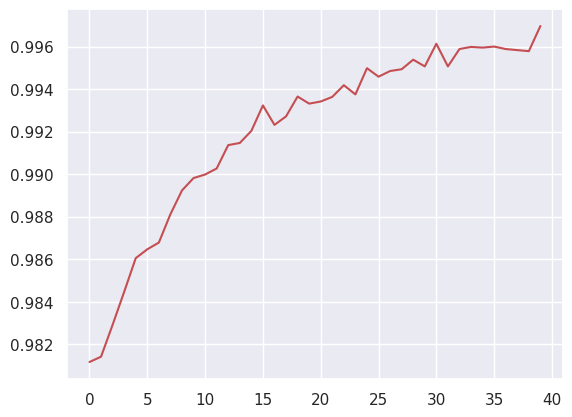

In [ ]:
plt.plot(model.history.history['accuracy'], 'r-')

In [ ]:
# take the x and y test and make a comparison with the training data
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2385 - accuracy: 0.9676


[0.2385437786579132, 0.9675999879837036]

In [ ]:
# show this to your manager
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 26506 (103.54 KB)
Trainable params: 26506 (103.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# a different way to do what we did above but all in one list
%%time
# ~30 seconds

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(256, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# adds a validation split and also batch size
# validation split is a way to predict how the model will take the training data and use it for testing
# from the train data take 25% for testing
history = model.fit(x_train, y_train, validation_split=0.25, epochs=5, batch_size=16, verbose=1)

Epoch 1/5
2813/2813 [==============================] - 17s 5ms/step - loss: 0.2278 - accuracy: 0.9325 - val_loss: 0.1349 - val_accuracy: 0.9601
Epoch 2/5
2813/2813 [==============================] - 15s 5ms/step - loss: 0.0953 - accuracy: 0.9717 - val_loss: 0.0999 - val_accuracy: 0.9700
Epoch 3/5
2813/2813 [==============================] - 15s 5ms/step - loss: 0.0609 - accuracy: 0.9811 - val_loss: 0.1082 - val_accuracy: 0.9679
Epoch 4/5
2813/2813 [==============================] - 14s 5ms/step - loss: 0.0448 - accuracy: 0.9856 - val_loss: 0.0910 - val_accuracy: 0.9726
Epoch 5/5
2813/2813 [==============================] - 13s 5ms/step - loss: 0.0330 - accuracy: 0.9894 - val_loss: 0.0941 - val_accuracy: 0.9744
CPU times: user 1min 15s, sys: 4.62 s, total: 1min 20s
Wall time: 1min 23s


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 256)               200960    
                                                                 
 dense_4 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203530 (795.04 KB)
Trainable params: 203530 (795.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


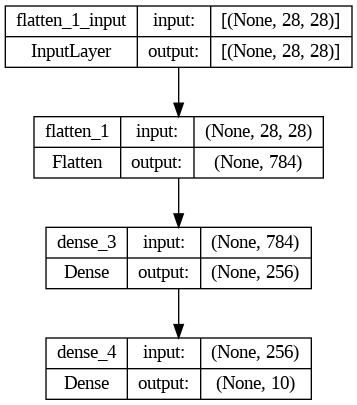

In [ ]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

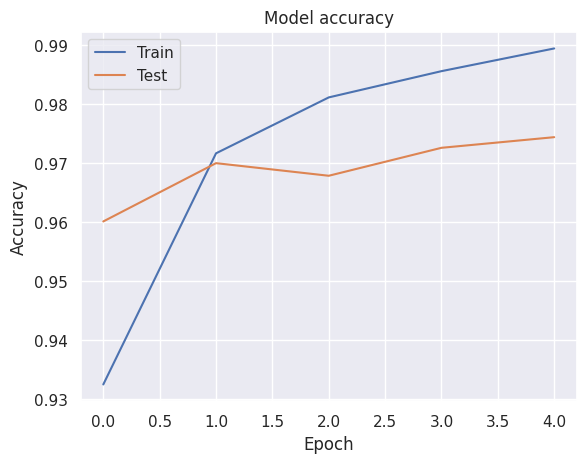

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
# take one of the values and reshape it 
# the dataset is composed of a matrix of values
# reshaping will take the 28 x 28 and turn it into 1 vectory
inp = x_test[4].reshape((1, 28, 28))
res = model.predict(inp)

1/1 [==============================] - 0s 27ms/step


In [ ]:
y_test[4]

4

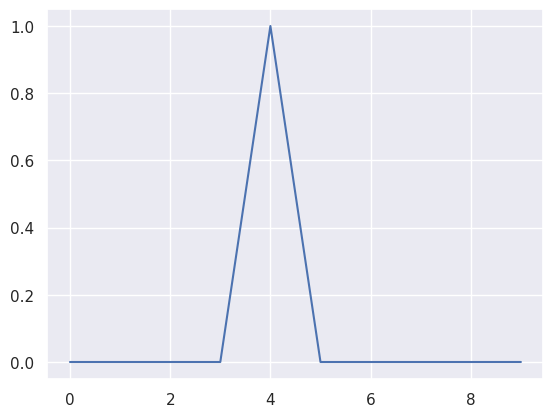

In [ ]:
# res = result
plt.plot(range(10), res[0])

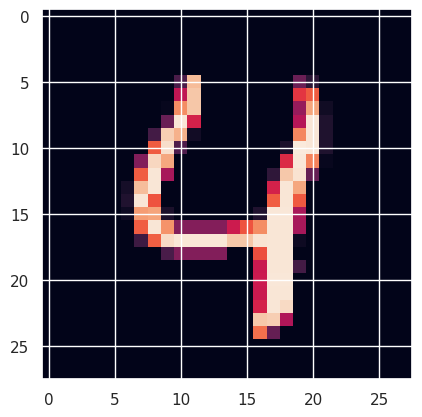

In [ ]:
plt.imshow(x_test[4])

In [ ]:
model.save('mnist_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
